(512, 252)


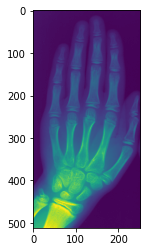

In [6]:
import pylab as plt
fpath = "archieve/test_img/2325.png"
img = plt.imread(fpath)
print(img.shape)
plt.imshow(img)
plt.show()

In [7]:
# for proper request sending we need to convert the image data to json
import json
from json import JSONEncoder
import numpy as np
import requests

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [8]:
# Serialization
numpyData = {"s3_key": fpath, "inputs": img}
encodedNumpyData = json.dumps(numpyData, cls=NumpyArrayEncoder)
#encodeNumpyData = json.dumps({'inputs': img.tolist()})

In [9]:
# send post to server
import time
start = time.process_time()
url = 'http://127.0.0.1:8090/png-predict/json'
response = requests.post(url, data=encodedNumpyData, headers={'content-type': 'application/json'})
print(f"Reponse time {time.process_time() - start}")

Reponse time 0.0069829999999999615


In [10]:
eval(response.content)

{'annotation': 'x-ray,plain radiography,analog,overview image|coronal,posteroanterior (PA),unspecified|upper extremity / arm,hand,finger|musculosceletal system',
 's3_key': 'archieve/test_img/2325.png'}

In [11]:
print(response.content)

b'{"annotation":"x-ray,plain radiography,analog,overview image|coronal,posteroanterior (PA),unspecified|upper extremity / arm,hand,finger|musculosceletal system","s3_key":"archieve/test_img/2325.png"}\n'
